In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as sch

# 예시

# 파트1 : 데이터 준비

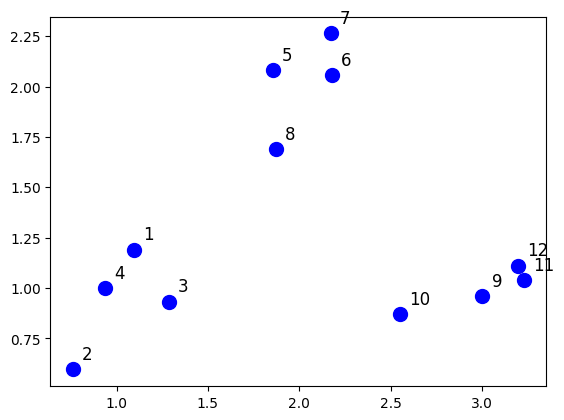

In [2]:
# 데이터 준비 & plot 그리기
np.random.seed(1234)
x = np.random.normal(loc=np.repeat([1, 2, 3], 4), scale=0.2)
y = np.random.normal(loc=np.repeat([1, 2, 1], 4), scale=0.2)
plt.scatter(x, y, color='blue', s=100)
for i, txt in enumerate(range(1, 13)):
    plt.text(x[i]+0.05, y[i]+0.05, str(txt), fontsize=12)
plt.show()

# 파트2 : 그림 그리기

Cluster labels: [0 0 0 0 2 2 2 2 1 1 1 1]


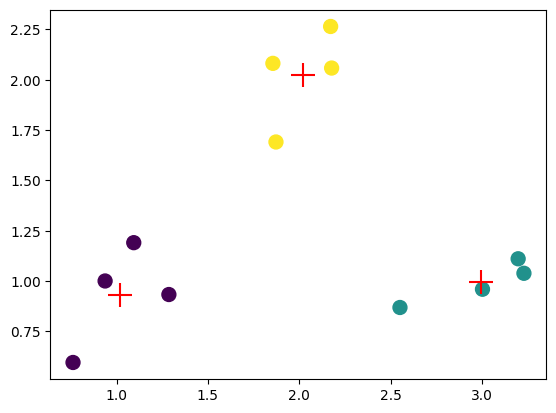

In [3]:
# kmeans() 써보기
dataFrame = pd.DataFrame({'x': x, 'y': y})
kmeans_obj = KMeans(n_clusters=3, max_iter=100, random_state=1234).fit(dataFrame)
print("Cluster labels:", kmeans_obj.labels_)

# 최종결과
plt.scatter(x, y, c=kmeans_obj.labels_, s=100, cmap='viridis')
plt.scatter(kmeans_obj.cluster_centers_[:, 0], kmeans_obj.cluster_centers_[:, 1], s=300, c='red', marker='+')
plt.show()

# 파트3 : 히트맵 그리기

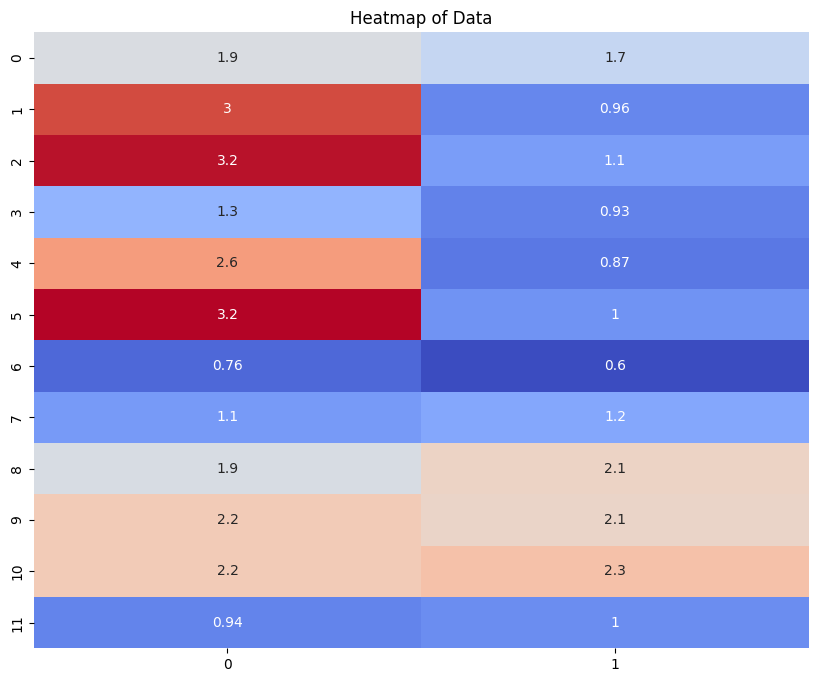

In [4]:
# 히트맵 - 데이터 준비
np.random.seed(1234)
datamat = dataFrame.sample(frac=1).values
kmeans_obj = KMeans(n_clusters=3, random_state=1234).fit(datamat)

# 히트맵 만들기 1
plt.figure(figsize=(10, 8))
sns.heatmap(datamat, annot=True, cmap='coolwarm', cbar=False)
plt.title("Heatmap of Data")
plt.show()

# 파트4 - 평가하기

In [5]:
# 클러스터 평가하기
data_dist = pdist(datamat)
data_km2 = KMeans(n_clusters=2, random_state=1234).fit(datamat)
data_km3 = KMeans(n_clusters=3, random_state=1234).fit(datamat)
data_km4 = KMeans(n_clusters=4, random_state=1234).fit(datamat)

silhouette_avg2 = silhouette_score(datamat, data_km2.labels_)
silhouette_avg3 = silhouette_score(datamat, data_km3.labels_)
silhouette_avg4 = silhouette_score(datamat, data_km4.labels_)

print(f"Silhouette Score for 2 clusters: {silhouette_avg2}")
print(f"Silhouette Score for 3 clusters: {silhouette_avg3}")
print(f"Silhouette Score for 4 clusters: {silhouette_avg4}")

Silhouette Score for 2 clusters: 0.5098714272732707
Silhouette Score for 3 clusters: 0.7056536395196518
Silhouette Score for 4 clusters: 0.5783727995658422


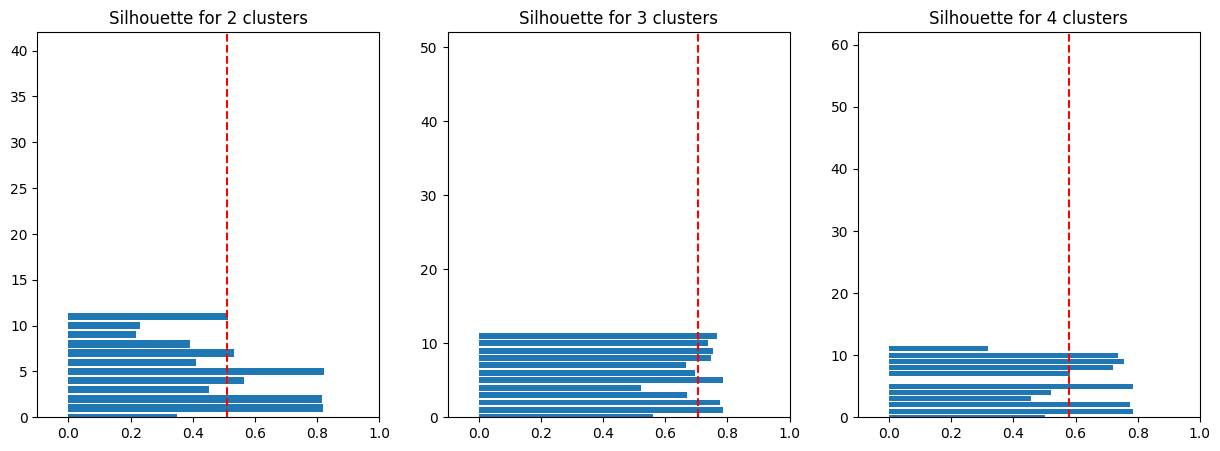

In [6]:
# 실루엣 분석 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

silhouette_values2 = silhouette_samples(datamat, data_km2.labels_)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(datamat) + (2 + 1) * 10])
ax1.barh(range(len(silhouette_values2)), silhouette_values2)
ax1.axvline(x=silhouette_avg2, color="red", linestyle="--")
ax1.set_title("Silhouette for 2 clusters")

silhouette_values3 = silhouette_samples(datamat, data_km3.labels_)
ax2.set_xlim([-0.1, 1])
ax2.set_ylim([0, len(datamat) + (3 + 1) * 10])
ax2.barh(range(len(silhouette_values3)), silhouette_values3)
ax2.axvline(x=silhouette_avg3, color="red", linestyle="--")
ax2.set_title("Silhouette for 3 clusters")

silhouette_values4 = silhouette_samples(datamat, data_km4.labels_)
ax3.set_xlim([-0.1, 1])
ax3.set_ylim([0, len(datamat) + (4 + 1) * 10])
ax3.barh(range(len(silhouette_values4)), silhouette_values4)
ax3.axvline(x=silhouette_avg4, color="red", linestyle="--")
ax3.set_title("Silhouette for 4 clusters")

plt.show()

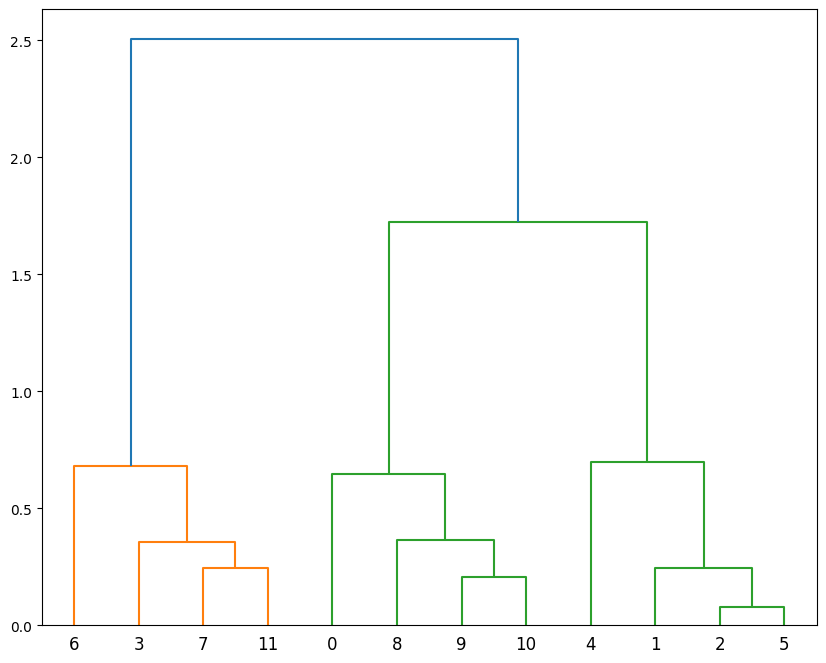

In [8]:
# 사각형 씌우기
hcluster = sch.linkage(datamat, method='complete')
plt.figure(figsize=(10, 8))
sch.dendrogram(hcluster)
plt.show()

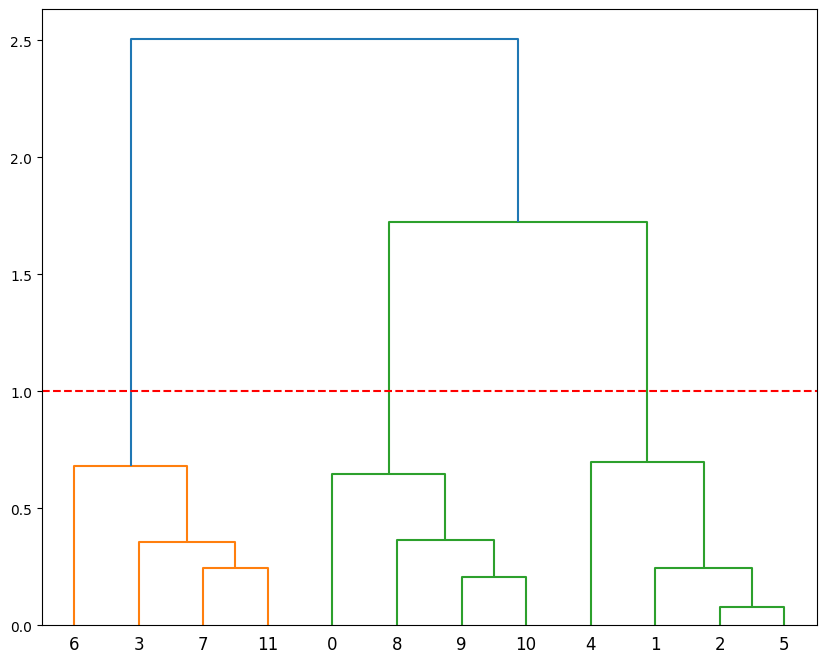

In [9]:
# 덴드로그램에 사각형 씌우기
plt.figure(figsize=(10, 8))
sch.dendrogram(hcluster)
plt.axhline(y=sch.cut_tree(hcluster, n_clusters=2).max(), color='r', linestyle='--')
plt.axhline(y=sch.cut_tree(hcluster, n_clusters=4).max(), color='g', linestyle='--')
plt.show()